# Exercise 3.31

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Math
from scipy import stats

In [2]:
# Import functions from chapter 4.
import sys
import os
sys.path.append(os.path.abspath('../chapter-4'))
from chapter_4_utils import box_cox_power_transform, plot_box_cox_transformation, power_transform_2d, plot_power_transformation_2d

- $x_{1} =$ Snow storm duration (hours)
- $x_{2} =$ Number of hours crews, men, and machine, spend to clear snow.

In [3]:
def load_data() -> pd.DataFrame:
    # Load the snow data.
    fpath = pathlib.WindowsPath(r'..\..\data\Table3.2.xlsx')
    return pd.read_excel(fpath)

In [4]:
snow_df = load_data()
snow_df.head(3)

,x1,x2
0,12.5,13.7
1,14.5,16.5
2,8.0,17.4


## (a)

Recap what happened with the transformations from Exercise 4.41.

In [5]:
x1_lmbda_points, x1_max_lmbda = box_cox_power_transform(snow_df.x1.to_numpy(), -5, 5)

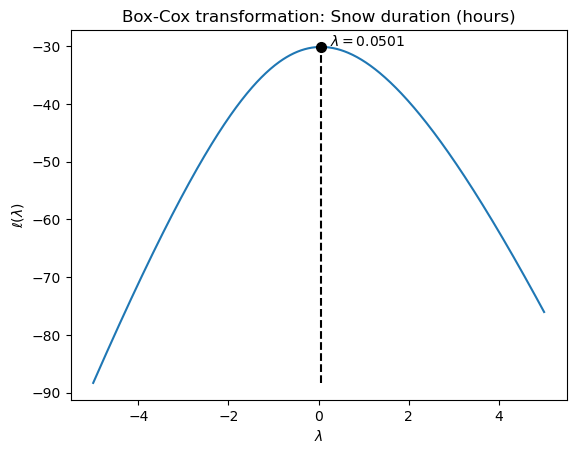

In [6]:
a_plt, a_ax = plot_box_cox_transformation(x1_lmbda_points, x1_max_lmbda, r'Snow duration (hours)')
a_plt.show()

In [7]:
x2_lmbda_points, x2_max_lmbda = box_cox_power_transform(snow_df.x2.to_numpy(), -5, 5)

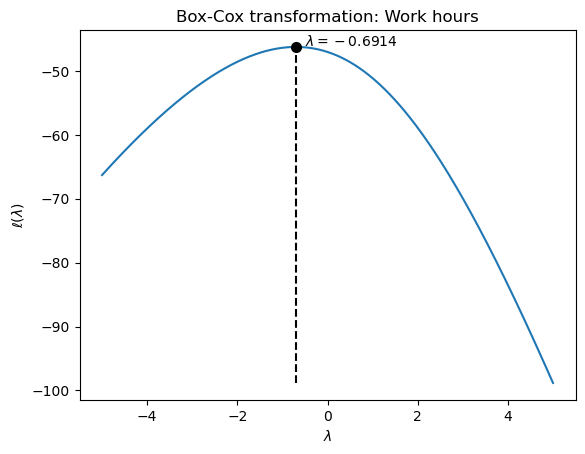

In [8]:
a_plt, a_ax = plot_box_cox_transformation(x2_lmbda_points, x2_max_lmbda, r'Work hours')
a_plt.show()

In [9]:
X = snow_df.to_numpy()
multivar_power = power_transform_2d(X, lam_min=-1, lam_max=1)

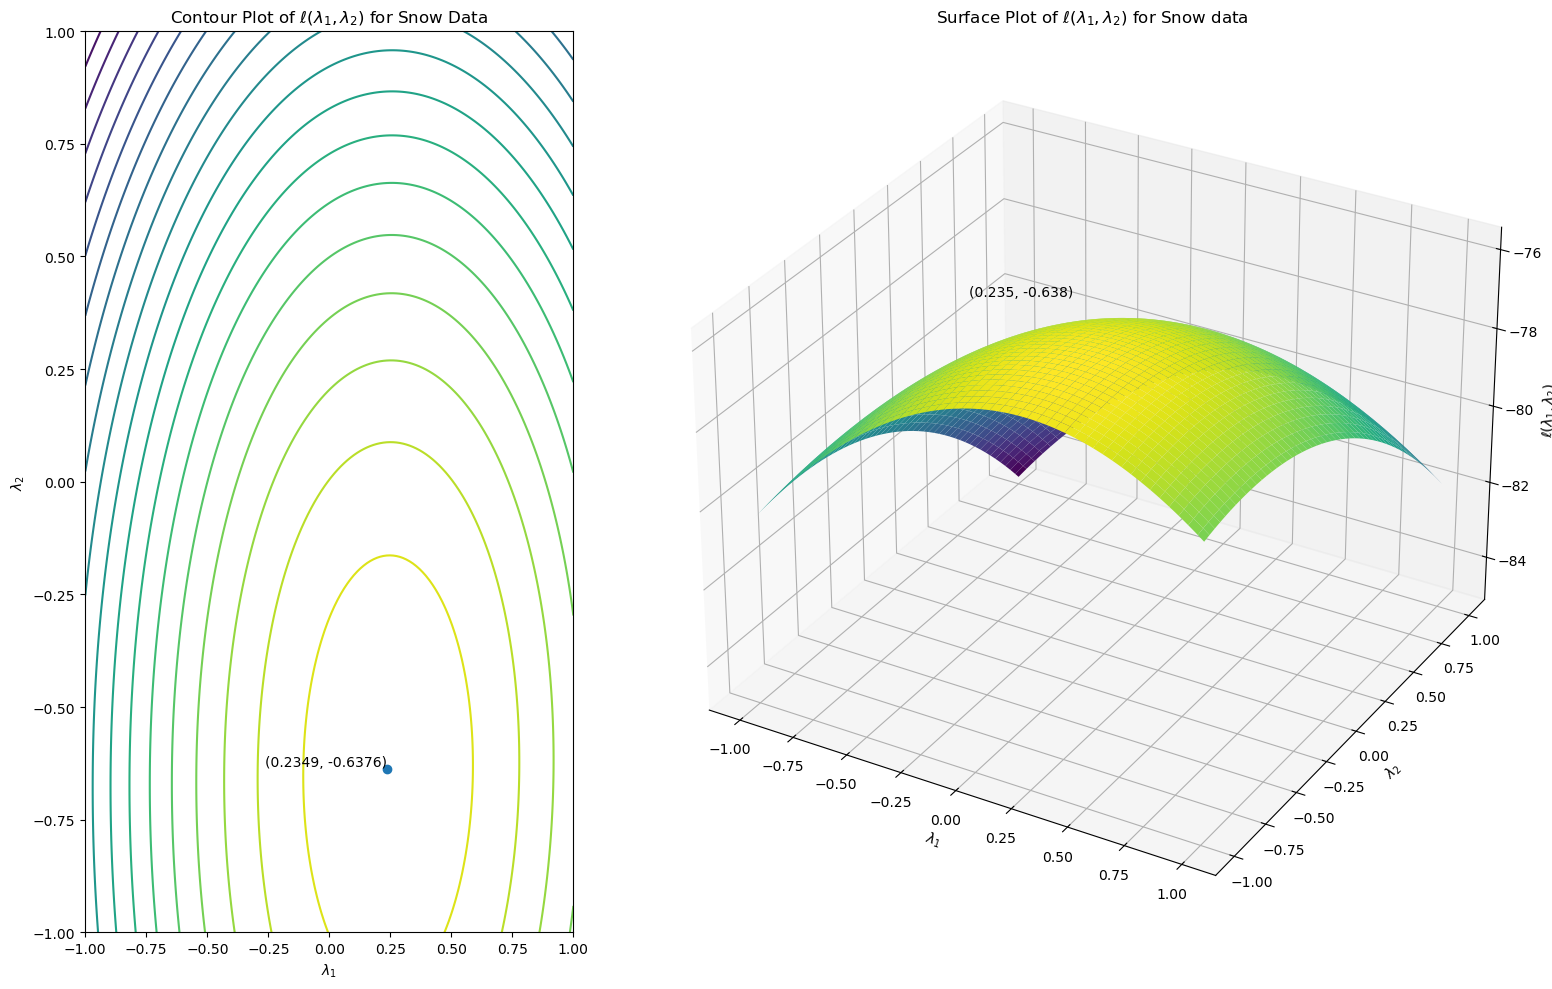

In [10]:
a_plt = plot_power_transformation_2d(multivar_power, 'Snow data')
# Save surface plot as PNG
# a_plt.savefig('./Question-5-31-a-surface.png', format='png')
# a_plt.show()

In [11]:
snow_df['x1_t'] = snow_df.x1 ** 0.25
snow_df['x2_t'] = snow_df.x2 ** -0.70
snow_df.head(3)

,x1,x2,x1_t,x2_t
0,12.5,13.7,1.880302,0.160065
1,14.5,16.5,1.951381,0.140527
2,8.0,17.4,1.681793,0.135399


In [12]:
X = snow_df[['x1_t', 'x2_t']].to_numpy()
n, p = X.shape
alpha = 0.05

In [13]:
from chapter_5_utils import plot_confidence_ellipse, bonferroni_conf_int

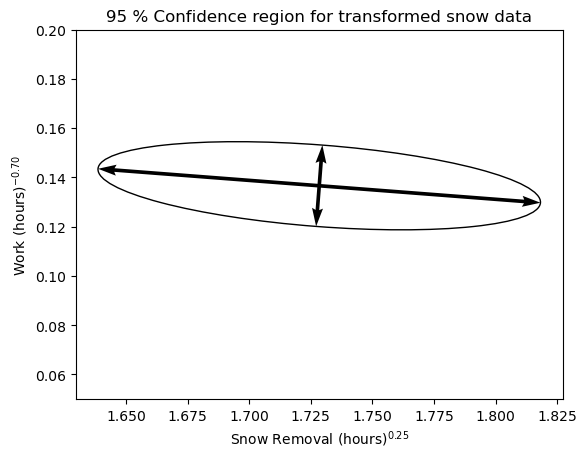

In [14]:
a_plt, a_ax = plot_confidence_ellipse(X, n, p, alpha)
a_plt.xlabel(r'$\text{Snow Removal (hours)}^{0.25}$')
a_plt.ylabel(r'$\text{Work (hours)}^{-0.70}$')
a_plt.title('95 % Confidence region for transformed snow data')
a_ax.set_ylim(0.05, 0.2)
a_ax.set_aspect('equal')
a_plt.savefig('Question-5-31-a-Confidence-Region.png')
a_plt.show()

## (b)

$$
\bar{x}_{i}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
            s_{ii}
        }{
            n
        }
    }
$$

In [15]:
xbar = np.mean(X, axis=0)[:, np.newaxis]
S = np.cov(X, rowvar=False)

In [16]:
bonfer_ci = bonferroni_conf_int(X, p, alpha)
bonfer_ci

array([[1.64807043, 1.80874769],
       [0.12059429, 0.152595  ]])

In [17]:
m=2
t_crit = stats.t.ppf(1-(alpha/(2*m)), n-1)
print(f'Bonferroni confidence intervals for the {m} mean lengths')
for i in range(bonfer_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{S[i,i]:.4f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 2 mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>